# Tests statistiques

## 1. Comparaison de la moyenne pour un échantillon

Ce type de test est appelé en anglais _«one-sample difference of means test»_.

### 1.1 Pour un échantillon suivant une loi normale

Nous allons utiliser le __test de Student__ (test de t) pour évaluer si un échantillon donné possède une moyenne connue.

Ce type de test est par exemple utile pour évaluer si la moyenne d'un échantillon correspond à la moyenne de l'ensemble de la population, c'est-à-dire si l'échantillon est représentatif par rapport à une caractérstique donnée.

Le test assume que les conditions suivantes sont vraies:
- l'échantillon suit une loi normale (peut être testé avec un test de Kolmogorov-Smirnov (voir plus loin)
- la variance est la même que pour la population de référence

___Exemple:___ nous aimerions savoir si la proportion de jeunes dans les régions Z05 du canton de Fribourg est la même que pour toute la Suisse.

Dans un premier temps, nous calculons la moyenne de jeunes de moins de 20 ans pour toutes les région Z05 de Suisse:

In [1]:
dch = read.csv(file="../data/stats/demo.tsv", sep="\t")
dch$jeunes = (dch$P0004M + dch$P0004F + dch$P0509M + dch$P0509F + dch$P1014M + dch$P1014F + dch$P1519M + dch$P1519F) / (dch$PTOT)
mean(dch$jeunes)

[1] 0.2101595

Et maintenant nous calculons également la moyenne pour le canton de Fribourg:

In [2]:
dfr = read.csv(file="demo-fribourg.tsv", sep="\t")
dfr$jeunes = (dfr$P0004M + dfr$P0004F + dfr$P0509M + dfr$P0509F + dfr$P1014M + dfr$P1014F + dfr$P1519M + dfr$P1519F) / (dfr$PTOT)
mean(dfr$jeunes)

[1] 0.24201

Nous avons donc une proportion de 24.2% de jeunes dans le canton de Fribourg, contre 21.0% en Suisse. Faisons le test pour savoir si cette différence est significative...

L'hypothèse à tester peut être formulée ainsi:

$H_0: \mu = 0.21016$  
$H_1: \mu \neq 0.21016$

Dans R, nous pouvons effectuer le test comme suit:

In [3]:
t.test(dfr$jeunes, mu=0.210159452094786)


	One Sample t-test

data:  dfr$jeunes
t = 7.4796, df = 47, p-value = 1.538e-09
alternative hypothesis: true mean is not equal to 0.2101595
95 percent confidence interval:
 0.2334434 0.2505766
sample estimates:
mean of x 
  0.24201 


La valeur p étant très proche de 0 (la valeur `1.538e-09` doit être interprétée comme $1.538 \cdot 10^{-9}$ ce qui est extrêment proche de 0; en fait c'est 0.000000001538 !!!), et donc la probabilité de commettre une erreur de type I étant quasiment nulle, nous rejetons l'hypothèse $H_0$.

Par ailleurs, R nous donne une indication en disant que l'hypothèse alternative est juste, avec la vraie moyenne n'étant pas 0.2101595.

___Conclusion:___ La moyenne de jeunes dans les région Z05 est donc significativement différente dans le canton de Fribourg que dans toute la Suisse.

Dans le test précédent, nous avons testé avec l'hypothèse $H_1 \neq 0.21016$. Nous pouvons aussi faire une test avec:

$H_0: \mu = 0.21016$  
$H_1: \mu > 0.21016$

In [4]:
t.test(dfr$jeunes, mu=0.210159452094786, alternative="greater")


	One Sample t-test

data:  dfr$jeunes
t = 7.4796, df = 47, p-value = 7.689e-10
alternative hypothesis: true mean is greater than 0.2101595
95 percent confidence interval:
 0.2348649       Inf
sample estimates:
mean of x 
  0.24201 


avec évidemment la même conclusion qu'avant.

### 1.2 Pour un échantillon ne suivant pas une loi normale

Si nous ne pouvons pas utiliser le test de Student pour évaluer si un échantillon donné possède une moyenne connue, nous utilisons le test de Wilcox à la place. Ceci est notamment le cas si un échantillon ne suit pas une loi normale.

Étant donné la grande similitude avec le test paramétrique, nous faisons ici juste l'exemple unilatéral, avec les hypothèses suivantes:

$H_0$ : $\mu = 0.21016$

$H_1$ : $\mu > 0.21016$

Le test peut être calculé comme suit dans R:

In [27]:
wilcox.test(x=dfr$jeunes, mu=0.210159452094786, alternative="greater")


	Wilcoxon signed rank test

data:  dfr$jeunes
V = 1101, p-value = 1.764e-09
alternative hypothesis: true location is greater than 0.2101595


où la valeur p est proche de 0, et du coup la probabilité de commettre une erreur en rejetant $H_0$ est très faible. En conséquence, nous concluons, comme plus haut déjà, que la proportion de jeunes dans le canton de Fribourg est en moyenne significativement plus élvée que dans la Suisse entière.

## 2. Comparer les moyennes de deux échantillons indépendants

Ce type de test est appelé en anglais _«two-sample difference of means test»_.

### 2.1 Pour deux échantillons suivants une loi normale

Nous allons également utiliser le __test de Student__ (test de t) pour évaluer si un échantillon donné possède la même moyenne qu'un deuxième échantillon donné.

Ce type de test est par exemple utile pour évaluer si la moyenne d'une région est la même que celle d'une autre région.

Il est important que les deux échantillons sont par ailleurs indépendants, ce qui exclut par exemple les séries temporelles.

Le test assume que les conditions suivantes sont vraies:
- les deux échantillons suivent une loi normale (peut être testé avec un test de Kolmogorov-Smirnov)
- la variance est la même que pour les deux échantillons

__Exemple__: nous aimerions savoir si la proportion de jeunes dans les régions Z05 du canton de Fribourg est la même que pour celles du canton de Genève.

Nous commençons par lire les deux fichiers, et à calculer les deux moyennes. D'abord pour le canton de Fribourg:

In [5]:
dfr = read.csv(file="demo-fribourg.tsv", sep="\t")
dfr$jeunes = (dfr$P0004M + dfr$P0004F + dfr$P0509M + dfr$P0509F + dfr$P1014M + dfr$P1014F + dfr$P1519M + dfr$P1519F) / (dfr$PTOT)
summary(dfr$jeunes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1756  0.2207  0.2400  0.2420  0.2652  0.2997 

puis pour le canton de Genève:

In [6]:
dge = read.csv(file="demo-geneve.tsv", sep="\t")
dge$jeunes = (dge$P0004M + dge$P0004F + dge$P0509M + dge$P0509F + dge$P1014M + dge$P1014F + dge$P1519M + dge$P1519F) / (dge$PTOT)
summary(dge$jeunes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1244  0.1830  0.2233  0.2210  0.2533  0.3310 

Donc 24.2% contre 22.1% de jeunes en moyenne dans les régions Z05 à Fribourg respectivement à Genève. On peut faire un boxplot pour chacun des cantons pour estimer visuellement si la proportion de jeunes est différente ou non:

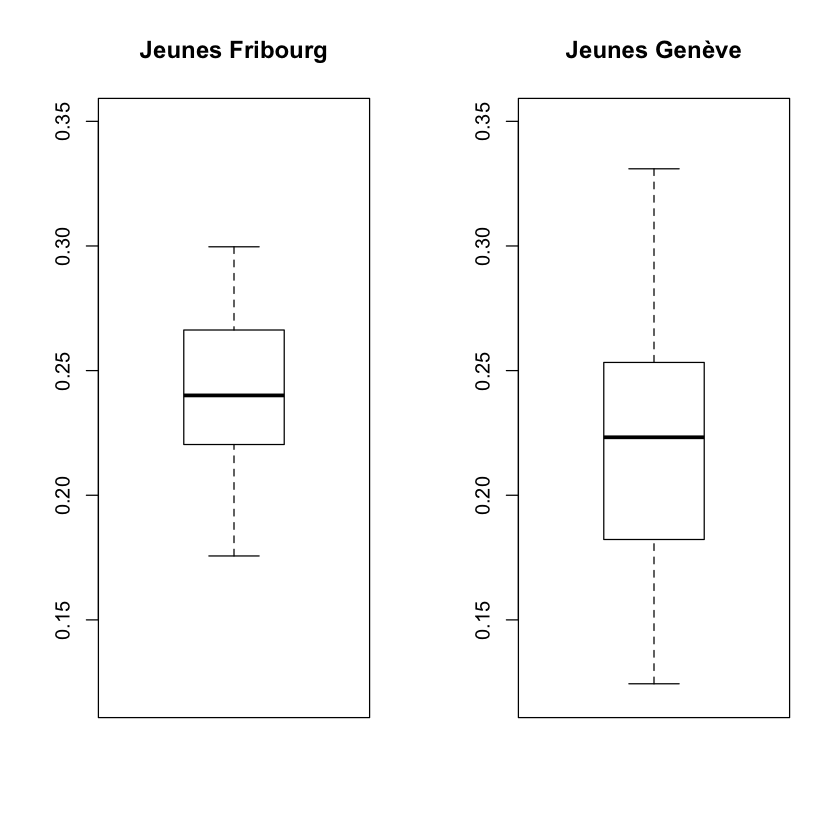

In [7]:
par(mfrow=c(1,2))
boxplot(dfr$jeunes, ylim=c(0.12, 0.35), main="Jeunes Fribourg")
boxplot(dge$jeunes, ylim=c(0.12, 0.35), main="Jeunes Genève")

Ensuite nous faisons le test de Student.

L'hypothèse à tester peut être formulée ainsi:

$H_0: \mu_1 - \mu_2 = 0$  
$H_1: \mu_1 - \mu_2 \neq 0$

Dans R, nous pouvons effectuer le test comme suit:

In [8]:
t.test(dfr$jeunes, dge$jeunes)


	Welch Two Sample t-test

data:  dfr$jeunes and dge$jeunes
t = 3.1176, df = 127.45, p-value = 0.002254
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.007678417 0.034360023
sample estimates:
mean of x mean of y 
0.2420100 0.2209908 


Selon la valeur-p obtenue, nous avons environ 0.23% de chance de commettre une erreur de type I, ce qui est très faible. Nous rejettons donc l'hypothèse $H_0$ selon laquelle les deux moyennes sont égales.

__Conclusion__: la proportion de jeunes est significativement différente dans les régions Z05 du canton de Fribourg de celles du canton de Genève. (sous condition que les deux échantillons suivent une loi normale, chose que nous n'avons pas vérifé!)

### 2.2 Pour deux échantillons ne suivants pas une loi normale

Il peut arriver qu'un échantillon ne suit pas une loi normale, et du coup une condition importante pour pouvoir faire un test de Student n'est plus rempli. Du coup nous devons utiliser un test non-paramétrique à la place.

Pour comparer la moyenne de deux échantillons, nous pouvons utiliser le test de Wilcoxon-Mann-Whitney. Le test compare les distributions des des échantillons, et du coup aussi la moyenne:

$H_0$: les distributions des deux échantillons sont identiques

$H_1$: les distributions des deux échantillons ne sont pas identiques

Nous pouvons calculer le test dans R comme suit (à nouveau pour tester la proportion de jeunes dans les cantons de Genève et Fribourg):

In [22]:
wilcox.test(x=dfr$jeunes, y=dge$jeunes)


	Wilcoxon rank sum test with continuity correction

data:  dfr$jeunes and dge$jeunes
W = 2472, p-value = 0.01514
alternative hypothesis: true location shift is not equal to 0


La probabilité de commettre une erreur si on rejette l'hypothèse $H_0$ est environ 1.5%.

Si nous utilisons un seuil de 5%, nous pouvons donc rejeter l'hypothèse $H_0$ et conclure que la proportion de jeunes à Fribourg n'est pas identique que celle à Genève. 

Par contre, si nous utilisons un seuil plus prudent de 1%, nous ne pouvons pas raisonnablement rejeter l'hypothèse $H_0$ et nous ne pouvons pas conclure qu'il y a une différence dans la distribution de la proportion de jeunes des deux cantons.


## 3. Comparer les moyennes de deux échantillons dépendants

L'exemple classique de deux échantillons dépendants est celui des séries temporelles. Si on veut comparer par exemple si la proportion de jeunes a changé significativement dans les communes du canton de Vaud entre 1970 et 2000, nous sommes en présence de deux échantillons qui mesurent la même chose au même endroit, mais juste à des moments temporels différents. Dans un tel cas, nous devons utiliser un test adapté à la situation.

Un autre exemple serait par exemple d'investiguer la question si la proportion de jeunes femmes est significativement différent de celle des jeunes hommes. Là aussi nous sommes en présence de __deux variables dépendantes__.

Nous allons utiliser un test adapté aux échantillons dépendants, à savoir où nous avons pour chaque individu ou unité spatiale deux valeurs.

### 3.1 Pour deux échantillons suivants une loi normale

Si nous sommes en présence de deux échantillons qui suivent une loi normale, nous allons utiliser un __test de Student__ adapté aux échantillons dépendants.

L'exemple que nous prenons est de comparer la proportion de personnes avec lieu de naissance en Suisse en 2010 et 2016 pour les région Z05. Ces données sont disponibles dans le fichier [data/stats/geostat/statpop_2010_2016_b_z05.tsv](../data/stats/geostat/statpop_2010_2016_b_z05.tsv). Ce sont les colonnes `b10b21_p` et `b16b21_p` qui nous intéressent.

Nous devons d'abord lire le fichier des données:

In [17]:
d_naiss = read.csv(file="../data/stats/geostat/statpop_2010_2016_b_z05.tsv", sep="\t")

On regarde rapidement quelques valeurs statistiques pour les deux colonnes qui nous intéressent:

In [18]:
summary(d_naiss$b10b21_p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.88   65.83   75.29   73.52   82.88   96.71 

In [19]:
summary(d_naiss$b16b21_p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.27   62.08   72.08   70.53   80.20   95.43 

En 2010, on avait donc en moyenne 73.52% de personnes nées en Suisse, tandis qu'en 2016, cette proportion était de 70.53%. Cette différence de 3%, est-elle significative?

Ensuite nous faisons un test de Student pour variables dépendantes (_«paired t-test»_).

L'hypothèse à tester peut être formulée ainsi:

$H_0: \mu_1 - \mu_2 = 0$  
$H_1: \mu_1 - \mu_2 \neq 0$

Dans R, nous pouvons effectuer le test comme suit:

In [20]:
t.test(d_naiss$b10b21_p, d_naiss$b16b21_p, paired=TRUE)


	Paired t-test

data:  d_naiss$b10b21_p and d_naiss$b16b21_p
t = 73.668, df = 1364, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.911178 3.070463
sample estimates:
mean of the differences 
               2.990821 


Le test est donc le même que le test de Student pour variables indépendantes, sauf pour le paramètre `paired=TRUE`.

Et le résultat: avec la valeur $p$ étant extrêmement petite, la probabilité de commettre une erreur de type 1 est presque négligable. En conséquence, nous pouvons donc rejeter l'hypothèse $H_0$ qui dit qu'il n'y a pas de différence dans les deux moyennes, pour conclure qu'il y a, en moyenne, significativement moins de résidents en Suisse qui sont aussi nés en Suisse en 2016 par rapport à 2010.

### 3.2 Pour deux échantillons ne suivants pas une loi normale

Comme déjà avec les échantillons indépendants, il y a aussi un test non-paramétrique alternatif pour les échantillons dépendants qui ne suivent pas une loi normale. Et comme déjà avec le test de Student, la différence dans la commande R est juste un paramètre `paired=TRUE` qu'il faut rajouter.

Voici les hypothèses à tester:

$H_0$: les deux échantillons suivent la même distribution  
$H_1$: les deux échantillons ne suivent pas la même distribution

In [28]:
wilcox.test(x=d_naiss$b10b21_p, y=d_naiss$b16b21_p, paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  d_naiss$b10b21_p and d_naiss$b16b21_p
V = 929710, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Le résultat est le même que pour le test de Student, c'est-à-dire la probabilité de commettre une erreur en rejetant l'hypothèse $H_0$ est très faible, et nous acceptons donc l'hypothèse $H_1$ comme quoi il y a en moyenne une différence entre la proportion de résidents nés en Suisse entre 2010 et 2016.

## 4. Vérifier si un échantillon suit une loi normale

Le test de Kolmogorov-Smirnov permet de tester si un échantillon suit une certaine distribution ou non. Il permet donc de tester si l'échantillon suit ou non une loi normale.

Les hypothèses sont comme suit:

$H_0$ : la population de laquelle a été tiré l'échantillon à tester suit la distribution de comparaison (p.ex. une loi normale)

$H_1$: la population de laquelle a été tiré l'échantillon ne suit pas la distribution de comparaison

On peut calculer le test comme suit, pour une loi normale:

In [9]:
ks.test(dfr$jeunes, "pnorm", mean=mean(dfr$jeunes), sd=sd(dfr$jeunes))


	One-sample Kolmogorov-Smirnov test

data:  dfr$jeunes
D = 0.065367, p-value = 0.9781
alternative hypothesis: two-sided


ou autrement dit la proportion de jeunes dans les régions Z05 du canton de Fribourg semble suivre une loi normale.

La valeur p est proche de 1, donc la probabilité de commettre une erreur de type 1 en cas de rejet de l'hypothèse $H_0$ est très élevée. Nous ne pouvons donc pas rejeter l'hypothèse $H_0$.

## 5. Discussion sur la pondération des unités spatiales

Un aspect que nous avons ignoré dans les exemples ci-dessus est le fait si nous pouvons réellement faire les calculs non pondérés de moyennes et variance que nous avons fait. En effet, ___le calcul de la moyenne d'une proportion à travers plusieurs unités spatiales de tailles différentes nécessite une pondération___. Voici un exemple hypothétique:

Dans la commune A résident 100'000 personnes, dont 24'000 de moins de 20 ans, soit 24%.
Dans la commune B résident 5'000 personnes, dont 2'000 de moins de 20 ans, soit 40%.
La moyenne de la proportion de jeunes dans les communes A et B se calcule correctement comme suit:

$\frac{24000 + 2000}{100000 + 5000} \cdot 100 = 24.76\%$

et non simplement comme nous l'avons fait:

$\frac{24\% + 40\%}{2} = 32\%$


Dans tous nos calculs des tests, nous n'avons pas utilisé de moyenne pondérée, et les tests ne sont pas fait pour une telle utilisation. Qu'est-ce que nous pouvons faire alors?

Dans la pratique, nous pouvons utiliser deux approches:

1. Utiliser un maillage spatial où les unités spatiales sont approximativement de la même taille en termes de population. C'est ce qu'on essaie de faire avec les région Z05 que nous utilisons comme jeu de données.

2. Utiliser une technique de ___ré-échantillonnage___ (on utilisera le _«bootstrapping»_) pour extraire une série d'échantillons ajustés au niveau de la taille, et de faire le calcul des tests pour chaque échantillon.

Tandis que la première méthode demande un certain travail au niveau de la préparation des données, la deuxième est plus intensive au niveau du calcul. Nous expliquons ci-dessous plus en détail la méthode du _bootstrapping_ pour une telle utilisation, avec un exemple concret d'un test simple.

### 5.1 La technique du _boostrap_

Le bootstrap est une méthode de _ré-échantillonnage_ où on crée, à partir d'un échantillon $A$ existant, un nouvel échantillon $A'$. Pour ce faire, on sélectionne aléatoirement un individu dans l'échantillon $A$ pour le mettre dans l'échantillon $A'$, et on répète ce processus $n$ fois, où c'est à nous de définir la valeur de $n$, c'est-à-dire la taille de l'échantillon $A'$. Il est important à noter qu'un individu $a_1$ qu'on trouve une seule fois dans l'échantillon original $A$ peut se trouver plusieurs fois dans $A'$, tandis qu'un autre individu $a_2$ peut ne pas y figurer du tout. On appelle cette méthode _«échantillonnage aléatoire avec remplacement»_ (_«random sampling with replacement»_ en anglais).

Vu que les deux échantillons $A$ et $A'$ proviennent de la même population, les propriétés statistiques comme la moyenne $\bar X$ ou l'écart-type $s$ sont en principe identiques.

On peut maintenant faire un bootstrap où la probabilité de sélection d'un individu dans l'échantillon d'origine n'est pas égale pour tous les individus, mais où elle est proportionnelle à une variable de pondération. Dans notre exemple ci-dessus, cette variable de pondération serait le nombre de résidents dans la commune. Ainsi, les valeurs d'une grande ville seront sélectionnées plus facilement que celles d'un petit village, et du coup on arrive à compenser les différences de poids entre les communes (les individus).

La taille de l'échantillon $A'$ est un paramètre qui doit être défini en avance. Il est une bonne idée de choisir une taille plus grande que l'échantillon d'origine, mais beaucoup plus petit que le nombre de résidents au total. Donc pour une taille de 300 communes, on pourra p.ex. choisir une taille d'échantillon de 1000 ou 1500 pour faire nos tests d'hypothèses.

Par la suite, et c'est une des caractéristiques importantes du bootstrap, on répète toute la procédure un nombre $R$ fois ($R$ peut par exemple être 1000), afin d'estimer la variabilité de la valeur statistique qu'on essaie d'estimer (pour une test d'hypothèse, c'est de voir dans combien de cas on rejète ou non l'hypothèse $H_0$).

### 5.2 Calcul d'un nouvel échantillon pondéré

Nous faisons ici l'exemple du calcul d'un nouvel échantillon pondéré selon la population, en suivant la technique du bootstrap décrite ci-dessus.

Dans un premier temps, nous voulons définir la taille du nouvel échantillon. Pour cela, nous regardons __la taille de l'échantillon d'origine__. Nous pouvons le faire avec la fonction `nrow` (___n__umber of __row__s_), ce qui donne dans le cas l'example des régions Z05 du canton de Fribourg:

In [10]:
nrow(dfr)

[1] 48

donc 48 unités Z05 dans le canton. Nous pouvons ainsi créer un nouvel échantillon avec p.ex. 200 unités.

Nous pouvons déterminer les unités Z05 à inclure dans le nouvel échantillon comme suit:

In [12]:
samp_idx = sample(x=seq_len(nrow(dfr)), size=1000, replace=TRUE, prob=dfr$PTOT)

où `dfr` sont les données chargées depuis le fichier CSV. `size` correspond à la nouvelle taille de l'échantillon, `replace` doit être `TRUE` étant donné qu'on utilise une méthode de _ré-échantillonnage __avec remplacement___. `prob` finalement indique la variable de pondération, dans notre cas la taille de la population.

Le résultat est mis dans une variable `samp_idx`. Cette variable contient les numéros de lignes des unités Z05 à inclure dans le nouvel échantillon, et non les unités elles-mêmes! (Vous pouvez afficher le contenu tout simplement en exécutant le code

```R
samp_idx
```

Finalement, pour créer le nouvel échantillon, il suffit de faire:

In [13]:
dfr_ech1 = dfr[samp_idx,]

On peut encore vérifier la taille de l'échantillon et quelques valeurs de statistique descriptive de la proportion de jeunes:

In [14]:
nrow(dfr_ech1)

[1] 1000

In [16]:
summary(dfr_ech1$jeunes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1756  0.2252  0.2436  0.2447  0.2688  0.2997 

(à comparer avec les valeurs obtenus plus haut...)